:::{.content-hidden}
# Visual Exploration
:::


In [1]:
import pandas as pd

# Load the CSV file
memespector_file = "/content/drive/MyDrive/2024-01-09-Bauernproteste/2024-01-11-Google-Vision-All.csv"
df = pd.read_csv(memespector_file)

df = df[['Image_BaseName', 'GV_Label_Descriptions']]

# Splitting the 'GV_Label_Descriptions' into individual labels
split_labels = df['GV_Label_Descriptions'].str.split(';').apply(pd.Series, 1).stack()
split_labels.index = split_labels.index.droplevel(-1)  # to line up with df's index
split_labels.name = 'Label'

# Joining the split labels with the original dataframe
df_split = df.join(split_labels)

# Creating a matrix of True/False values for each label per Image_BaseName
matrix = pd.pivot_table(df_split, index='Image_BaseName', columns='Label', aggfunc=lambda x: True, fill_value=False)

# Resetting the column headers to be the label names only
matrix.columns = [col[1] for col in matrix.columns.values]

# Now 'matrix' has a single level of column headers with only the label names


In [2]:
matrix

,Adaptation,Advertising,Afterglow,Agricultural machinery,Agriculture,Air travel,Aircraft,Airliner,Airplane,Alloy wheel,...,Vertebrate,Water,Water resources,Wheel,Whiskers,White,Window,Wood,Working animal,World
Image_BaseName,,,,,,,,,,,,,,,,,,,,,
6750551853789891846.jpg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6750761577349254405.jpg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6751467034741067014.jpg,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6763591353164254469.jpg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6766552734108749062.jpg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321800737606896928.jpg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7321804342179204384.jpg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7321804909290999045.jpg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Ensuring that 'Image_BaseName' is not part of the matrix to apply PCA
image_base_names = matrix.index  # Saving the image base names for later use
label_matrix = matrix.values  # Convert to numpy array for PCA

# Dimensionality reduction using PCA
# Considering a variance ratio of 0.95 to determine the number of components
pca = PCA(n_components=0.95)
matrix_reduced = pca.fit_transform(label_matrix)

# If needed, you can create a DataFrame from the PCA-reduced matrix and reattach the 'Image_BaseName' column
matrix_reduced_df = pd.DataFrame(matrix_reduced, index=image_base_names)

In [4]:
matrix_reduced_df

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
Image_BaseName,,,,,,,,,,,,,,,,,,,,,
6750551853789891846.jpg,1.392793,-0.851573,-0.225060,-0.630954,0.345822,-0.313126,0.376667,0.370456,-0.012519,-0.898472,...,-0.007803,0.022912,-0.002782,0.019272,-0.005465,-0.005129,0.011833,0.000200,0.006499,0.010995
6750761577349254405.jpg,-1.045212,0.139963,-0.396712,0.505531,-0.186165,0.278001,0.860551,-0.387782,-0.041959,0.146992,...,0.020865,0.027422,0.064993,0.046791,0.042511,-0.040843,-0.091713,-0.064683,0.043392,-0.045372
6751467034741067014.jpg,0.364738,0.089808,0.603463,0.717136,0.084382,0.130516,0.835040,0.056190,-0.175465,-0.551632,...,-0.009497,0.144801,-0.020713,0.035502,-0.085562,-0.169911,0.083582,0.045916,-0.123521,0.032273
6763591353164254469.jpg,0.657532,-0.007257,-0.226448,-0.142833,-0.615043,-0.208217,-0.082478,0.181550,0.899774,0.462160,...,-0.025889,0.006257,0.060421,0.028564,0.045773,0.000179,0.003499,0.027838,0.007171,-0.051516
6766552734108749062.jpg,1.638604,-0.418596,-0.178993,-0.522654,0.663303,-0.186928,1.000894,-0.307874,-0.172688,0.336597,...,-0.009052,-0.002043,0.007575,-0.031553,0.007831,-0.005779,-0.023599,-0.021165,-0.000496,-0.006467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321800737606896928.jpg,-0.698156,0.191274,-0.529836,0.047008,0.862388,-0.111187,-0.390502,-0.089231,0.144091,0.326504,...,-0.015025,-0.068188,-0.023787,0.009343,0.004624,0.001396,0.097441,0.145987,-0.102992,0.110626
7321804342179204384.jpg,0.032051,0.048450,0.454149,-0.012114,0.395014,0.128612,0.042362,1.019634,-0.367217,1.025644,...,-0.002146,-0.042328,0.114229,-0.066740,-0.051395,-0.021397,0.012134,0.046365,-0.005712,0.036329
7321804909290999045.jpg,1.005015,0.923683,0.371054,0.533427,0.356759,0.813597,0.087288,-0.289707,0.377865,1.242866,...,0.005721,0.000672,0.021087,0.020260,0.037709,0.000290,0.015725,0.013237,0.018040,-0.002060


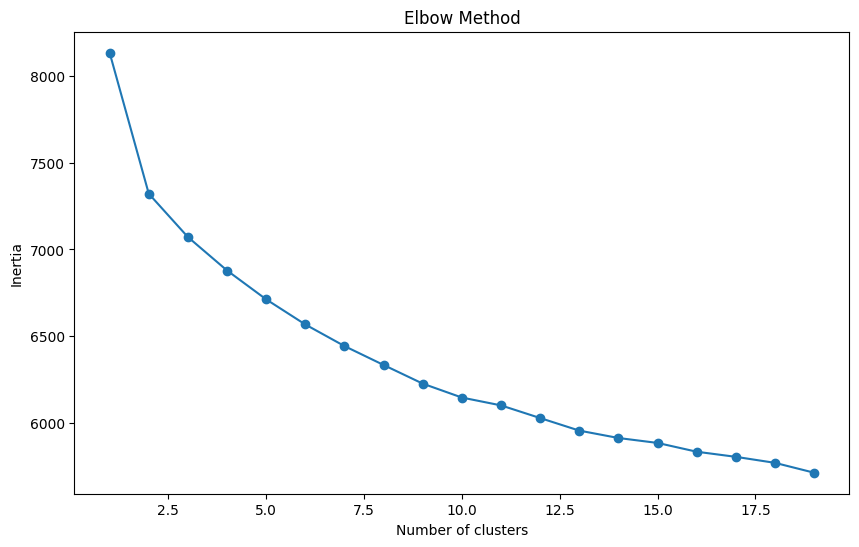

In [5]:
# Elbow method to determine optimal number of clusters
inertia = []
range_values = range(1, 20)  # Checking for 1 to 10 clusters

for i in range_values:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(matrix_reduced_df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

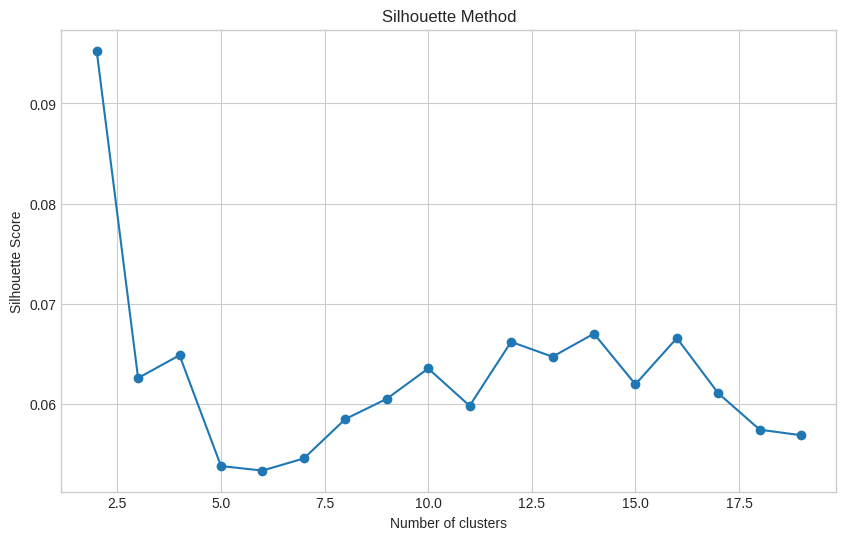

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of clusters to try
range_values = range(2, 20)

silhouette_scores = []

# Perform k-means clustering and compute silhouette scores
for i in range_values:
    try:
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(matrix_reduced_df)
        score = silhouette_score(matrix_reduced_df, kmeans.labels_)
        silhouette_scores.append(score)
    except Exception as e:
        print(f"An error occurred with {i} clusters: {e}")

# Plotting the Silhouette Scores
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 6))
    plt.plot(range_values, silhouette_scores, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()


In [8]:
# Final k-means clustering using n clusters
kmeans_final = KMeans(n_clusters=11, n_init=10, random_state=0)
clusters = kmeans_final.fit_predict(matrix_reduced)

# Adding the cluster information back to the original dataframe
matrix['Cluster'] = clusters

In [12]:
# Displaying the first few rows of the dataframe with cluster information
matrix.head()

,Adaptation,Advertising,Afterglow,Agricultural machinery,Agriculture,Air travel,Aircraft,Airliner,Airplane,Alloy wheel,...,Water,Water resources,Wheel,Whiskers,White,Window,Wood,Working animal,World,Cluster
Image_BaseName,,,,,,,,,,,,,,,,,,,,,
6750551853789891846.jpg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,8
6750761577349254405.jpg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
6751467034741067014.jpg,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6
6763591353164254469.jpg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
6766552734108749062.jpg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,8


In [ ]:
!unzip /content/drive/MyDrive/2024-01-09-Bauernproteste/2024-01-09-Images-Clean.zip

In [ ]:
# Display the result. See linked notebook for code.